# Analysis of Titanic Dataset

In [45]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# importing dataset
df = pd.read_csv('titanic.csv')

### Data Cleaning

In [46]:
# data format:

# pclass    -- Passenger Class (1= 1st, 2= 2nd, 3= 3rd)
# survived  -- Survival (0 = No, 1 = Yes)
# name      -- Name
# sex       -- Sex (male/female)
# age       -- Age
# sibsp     -- Number of Siblings/Spouse Aboard
# parch     -- Number of Parents/Children Aboard
# ticket    -- Ticket No.
# fare      -- Fare
# cabin     -- Cabin
# embarked  -- Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
# boat      -- Life Boat (if survived)
# body      -- Body Number (if not survived and the body is recovered)
# home.dest -- Home Destination

print(df.shape)
df.head()

(1309, 14)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [47]:
# removing irrelevant columns for the analysis
df = df.drop(['name', 'ticket', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1)

print(df.shape)
df.head()

(1309, 7)


,pclass,survived,sex,age,sibsp,parch,fare
0,1,1,female,29.0000,0,0,211.3375
1,1,1,male,0.9167,1,2,151.5500
2,1,0,female,2.0000,1,2,151.5500
3,1,0,male,30.0000,1,2,151.5500
4,1,0,female,25.0000,1,2,151.5500


In [48]:
# checking for missing values
df.isnull().sum()

pclass        0
survived      0
sex           0
age         263
sibsp         0
parch         0
fare          1
dtype: int64

In [49]:
# filling nan values in age column with the median age of the respective sex
male_median_age = df[df['sex'] == 'male']['age'].median()
female_median_age = df[df['sex'] == 'female']['age'].median()

df.loc[(df['sex'] == 'male') & (df['age'].isnull()), 'age'] = male_median_age
df.loc[(df['sex'] == 'female') & (df['age'].isnull()), 'age'] = female_median_age

# filling nan values in fare column with the mean fare of the respective class
df.loc[df['fare'].isnull(), 'fare'] = df.groupby('pclass')['fare'].transform('mean')

df.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [50]:
# checking for duplicates and removing them
print(df.duplicated().sum())
df = df.drop_duplicates()

df.shape

209


(1100, 7)

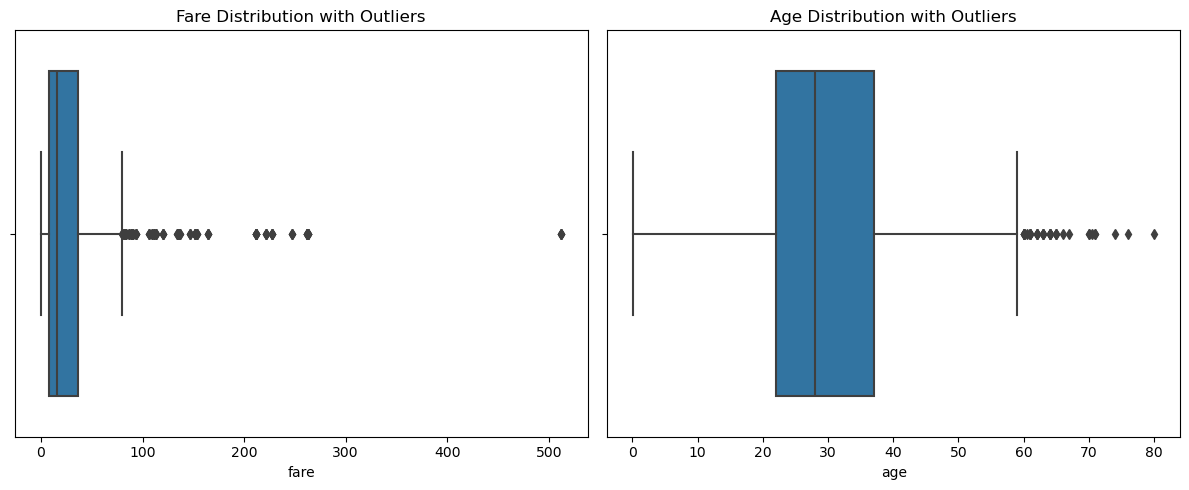

In [51]:
# checking for outliers using boxplots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['fare'])
plt.title('Fare Distribution with Outliers')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['age'])
plt.title('Age Distribution with Outliers')

plt.tight_layout()
plt.show()

In [52]:
# from the boxplots, we can see that there are outliers in both fare and age columns
# but I am not going to remove them because they are not errors in the data, and also in this case, 
# extreme values(say highly wealty passengers, or very old passengers) can have meaningful correlations with survival

In [53]:
# checking for mispelled values in sex column
print(df['sex'].unique())

['female' 'male']


In [54]:
# only two unique values, so no mispelled values

In [55]:
# combining sibsp and parch columns into a single, more meaningful column is_alone
# is_alone: 1 if the passenger is travelling alone, 0 otherwise
df['is_alone'] = (df['sibsp'] + df['parch'] == 0).astype(int)
df = df.drop(['sibsp', 'parch'], axis=1)

print(df.shape)
df.head()

(1100, 6)


,pclass,survived,sex,age,fare,is_alone
0,1,1,female,29.0000,211.3375,1
1,1,1,male,0.9167,151.5500,0
2,1,0,female,2.0000,151.5500,0
3,1,0,male,30.0000,151.5500,0
4,1,0,female,25.0000,151.5500,0


### Univariate Analysis

In [56]:
df.head()

,pclass,survived,sex,age,fare,is_alone
0,1,1,female,29.0000,211.3375,1
1,1,1,male,0.9167,151.5500,0
2,1,0,female,2.0000,151.5500,0
3,1,0,male,30.0000,151.5500,0
4,1,0,female,25.0000,151.5500,0


##### i. Analyzing Age Distribution

Mean: 29.8
Median: 28.0
Standard Deviation: 13.88
Skewness: 0.45
Kurtosis: 0.44


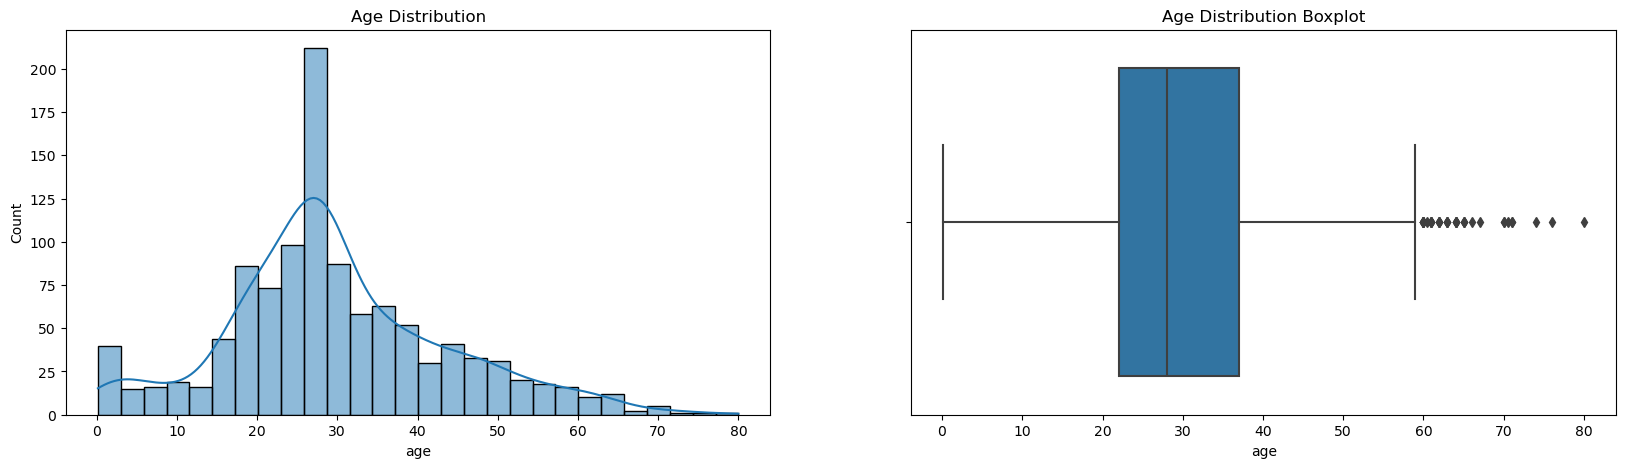

In [57]:
print('Mean:', df['age'].mean().__round__(2))
print('Median:', df['age'].median())
print('Standard Deviation:', df['age'].std().__round__(2))
print('Skewness:', df['age'].skew().__round__(2))
print('Kurtosis:', df['age'].kurt().__round__(2))

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['age'])
plt.title('Age Distribution Boxplot')
plt.show()

##### ii. Analyzing Fare Distribution

Mean: 36.93
Median: 16.1
Standard Deviation: 55.31
Skewness: 4.07
Kurtosis: 23.31


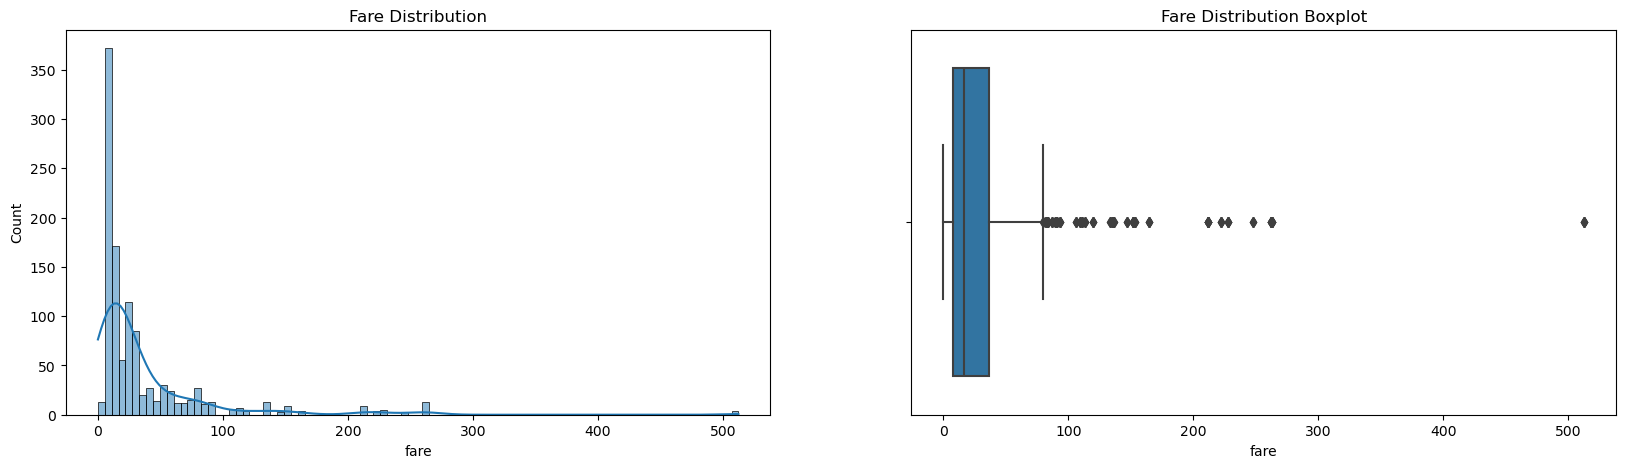

In [58]:
print('Mean:', df['fare'].mean().__round__(2))
print('Median:', df['fare'].median())
print('Standard Deviation:', df['fare'].std().__round__(2))
print('Skewness:', df['fare'].skew().__round__(2))
print('Kurtosis:', df['fare'].kurt().__round__(2))

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['fare'], kde=True)
plt.title('Fare Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['fare'])
plt.title('Fare Distribution Boxplot')
plt.show()

##### iii. Analyzing Sex Distribution

Number of male passengers:  428
Number of female passengers:  672


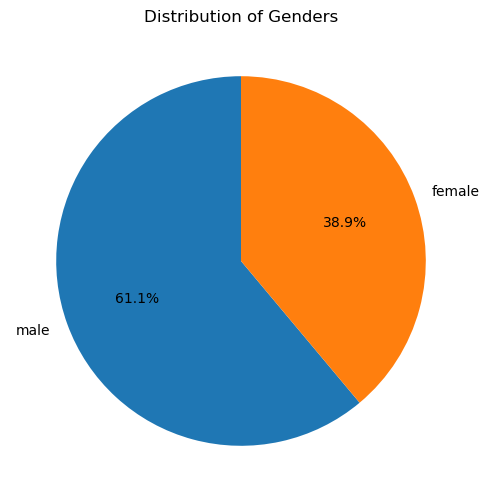

In [59]:
sex_counts = df['sex'].value_counts()

print("Number of male passengers: ", sex_counts[1])
print("Number of female passengers: ", sex_counts[0])

plt.figure(figsize=(6, 6))
plt.pie(sex_counts,
        labels=sex_counts.index,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Distribution of Genders')
plt.show()

##### iv. Analyzing Passenger Class Distribution

Number of passengers in 1st class:  312
Number of passengers in 2nd class:  241
Number of passengers in 3rd class:  547


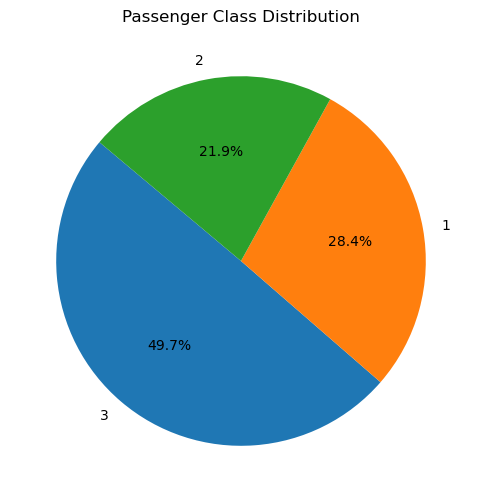

In [60]:
class_counts = df['pclass'].value_counts()

print("Number of passengers in 1st class: ", class_counts[1])
print("Number of passengers in 2nd class: ", class_counts[2])
print("Number of passengers in 3rd class: ", class_counts[3])

plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Passenger Class Distribution')
plt.show()

##### v. Analyzing Survival of Passengers

Number of passengers who survived:  464
Number of passengers who did not survive:  636


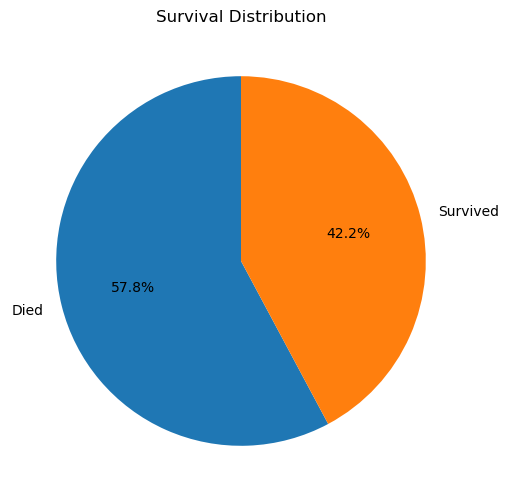

In [61]:

survived = ["Died", "Survived"]
survival_counts = df['survived'].value_counts()

survival_counts = df['survived'].value_counts()
print("Number of passengers who survived: ", survival_counts[1])
print("Number of passengers who did not survive: ", survival_counts[0])

plt.figure(figsize=(6, 6))
plt.pie(survival_counts,
        labels=[survived[i] for i in survival_counts.index],
        autopct='%1.1f%%',
        startangle=90)
plt.title('Survival Distribution')
plt.show()

##### vi. Analyzing Wether the Passenger was Alone or Not

Number of passengers who were not alone:  490
Number of passengers who were alone:  610


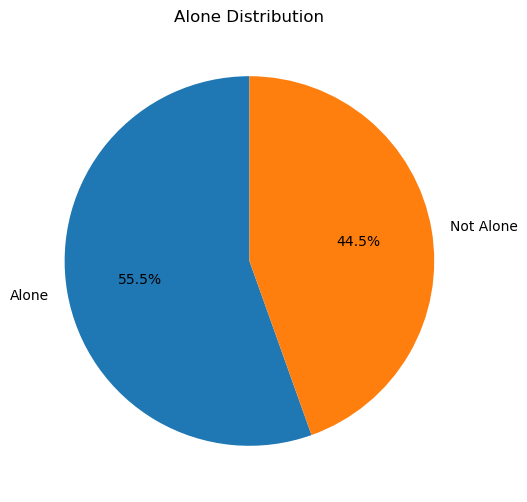

In [62]:
alone = ["Not Alone", "Alone"]
alone_counts = df['is_alone'].value_counts()

print("Number of passengers who were not alone: ", alone_counts[0])
print("Number of passengers who were alone: ", alone_counts[1])

plt.figure(figsize=(6, 6))
plt.pie(alone_counts,
        labels=[alone[i] for i in alone_counts.index],
        autopct='%1.1f%%',
        startangle=90)
plt.title('Alone Distribution')
plt.show()

### Bivariate Analysis

In [63]:
df.head()

,pclass,survived,sex,age,fare,is_alone
0,1,1,female,29.0000,211.3375,1
1,1,1,male,0.9167,151.5500,0
2,1,0,female,2.0000,151.5500,0
3,1,0,male,30.0000,151.5500,0
4,1,0,female,25.0000,151.5500,0


##### i. Correlation Between Passenger Class and Survival

<Figure size 1200x600 with 0 Axes>

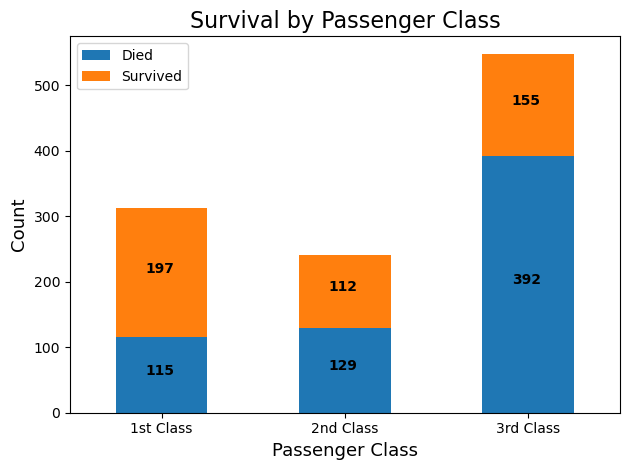

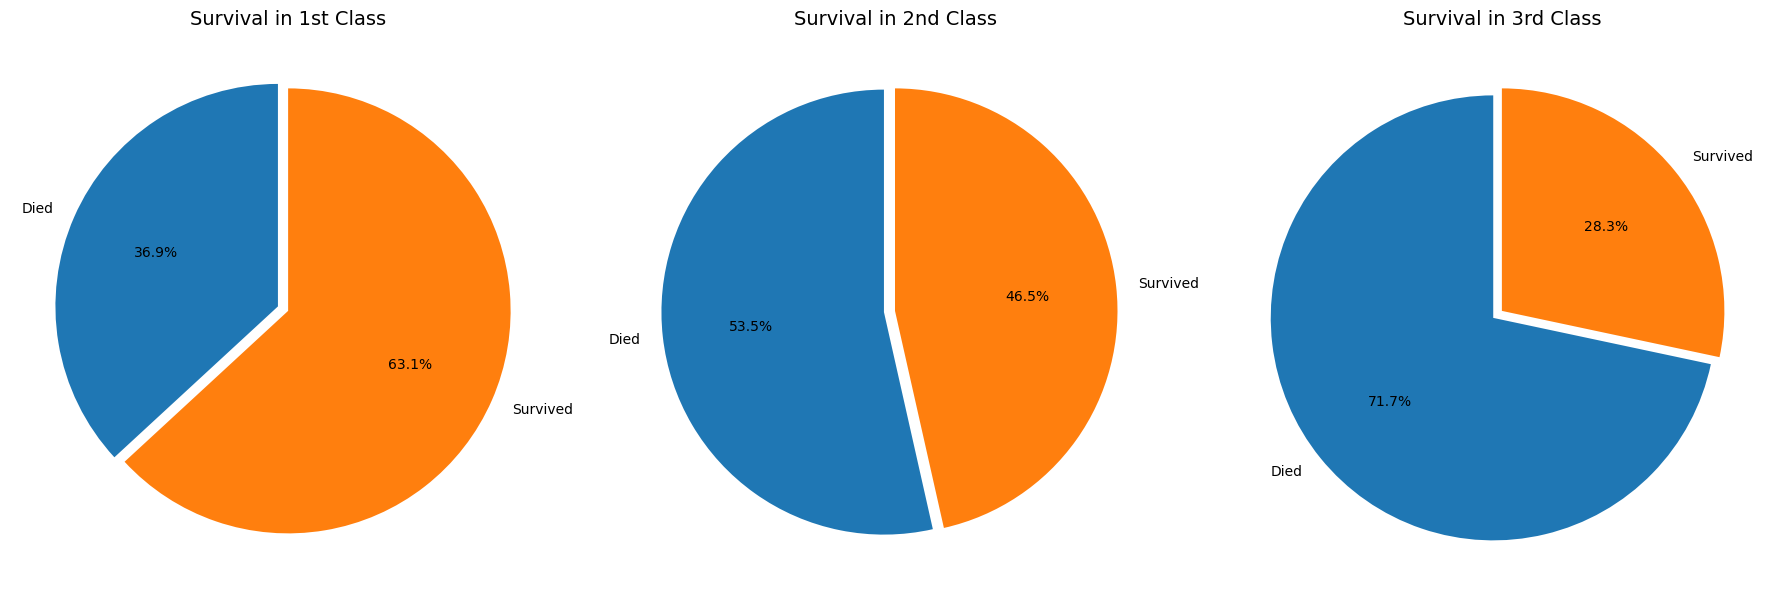

In [64]:
survival_by_class = pd.crosstab(df['pclass'], df['survived'],
                                rownames=['Class'],
                                colnames=['Survived'],)

survival_by_class.columns = ['Died', 'Survived']

survival_percentages = {}
for pclass in [1, 2, 3]:
    class_data = df[df['pclass'] == pclass]
    total = len(class_data)
    survived = class_data['survived'].sum()
    died = total - survived
    survival_percentages[pclass] = [died/total*100, survived/total*100]

plt.figure(figsize=(12, 6))
survival_by_class.plot(kind='bar', stacked=True)
plt.title('Survival by Passenger Class', fontsize=16)
plt.xlabel('Passenger Class', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'], rotation=0)
plt.legend(['Died', 'Survived'])

for i, (died, survived) in enumerate(zip(survival_by_class['Died'], survival_by_class['Survived'])):
    plt.text(i-0.09, died/2, str(died), fontweight='bold')
    plt.text(i-0.09, died + survived/2, str(survived), fontweight='bold')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
classes = [1, 2, 3]
class_names = ['1st Class', '2nd Class', '3rd Class']

for i, pclass in enumerate(classes):
    axes[i].pie(survival_percentages[pclass], 
                labels=['Died', 'Survived'],
                autopct='%1.1f%%',
                startangle=90,
                explode=(0.05, 0))
    axes[i].set_title(f'Survival in {class_names[i]}', fontsize=14)

plt.tight_layout()
plt.show()

In [65]:
chi2, p, dof, expected = chi2_contingency(survival_by_class)
print(f"Chi-square value: {chi2:.2f}")
print(f"p-value: {p:.6f}")
print(f"Degrees of freedom: {dof}")
print("Interpretation: " + ("There is a significant relationship between passenger class and survival" 
                          if p < 0.05 else 
                          "There is no significant relationship between passenger class and survival"))

Chi-square value: 101.01
p-value: 0.000000
Degrees of freedom: 2
Interpretation: There is a significant relationship between passenger class and survival


##### ii. Correlation Between Survival and Sex

<Figure size 1200x600 with 0 Axes>

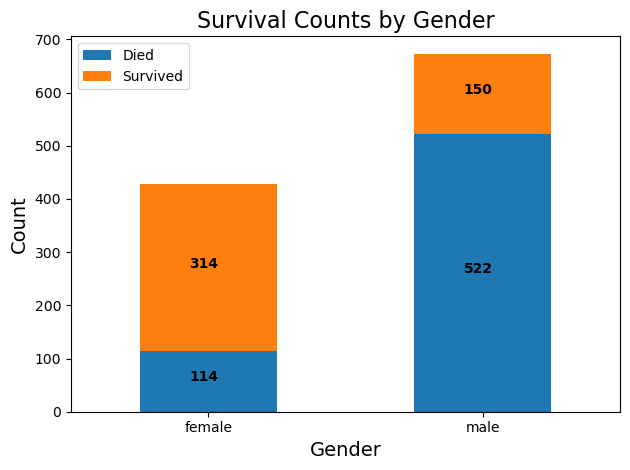

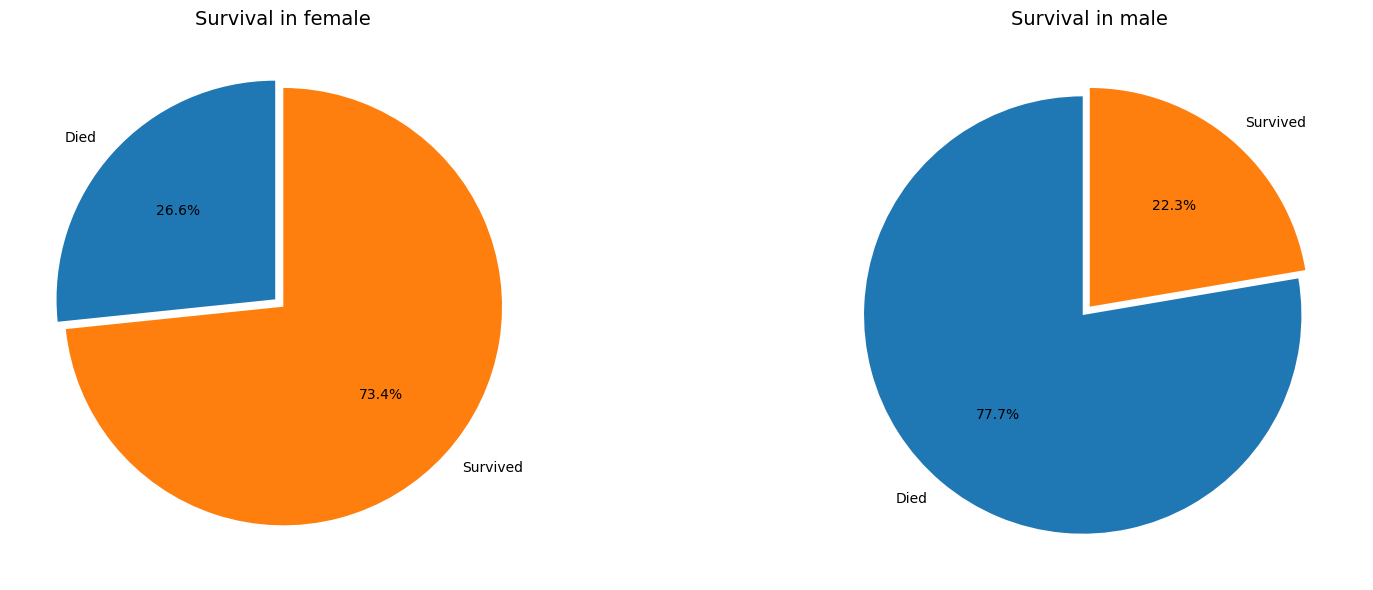

In [66]:
survival_by_sex = pd.crosstab(df['sex'], df['survived'], 
                             rownames=['Sex'], 
                             colnames=['Survived'])

survival_by_sex.columns = ['Died', 'Survived']

survival_percentages = {}
for gender in df['sex'].unique():
    gender_data = df[df['sex'] == gender]
    total = len(gender_data)
    survived = sum(gender_data['survived'] == 1)
    died = total - survived
    survival_percentages[gender] = [died/total*100, survived/total*100]

plt.figure(figsize=(12, 6))
survival_by_sex.plot(kind='bar', stacked=True)
plt.title('Survival Counts by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.legend(['Died', 'Survived'])

for i in range(len(survival_by_sex.index)):
    if 'Died' in survival_by_sex.columns:
        died = survival_by_sex['Died'].iloc[i]
        plt.text(i-0.07, died/2, str(died), fontweight='bold')
    if 'Survived' in survival_by_sex.columns:
        survived = survival_by_sex['Survived'].iloc[i]
        plt.text(i-0.07, died +survived/2, str(survived), fontweight='bold')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, len(survival_percentages), figsize=(18, 6))
class_labels = {1: '1st Class', 2: '2nd Class', 3: '3rd Class'}

if len(survival_percentages) == 1:
    axes = [axes]

for i, (pclass, counts) in enumerate(survival_percentages.items()):
    total = sum(counts)
    percentages = [count/total*100 for count in counts]
    
    axes[i].pie(percentages, 
                labels=['Died', 'Survived'],
                autopct='%1.1f%%',
                startangle=90,
                explode=(0.05, 0))
    class_name = class_labels.get(pclass, f'{pclass}')
    axes[i].set_title(f'Survival in {class_name}', fontsize=14)

plt.tight_layout()
plt.show()

##### iii. Correlation Between Age and Survival

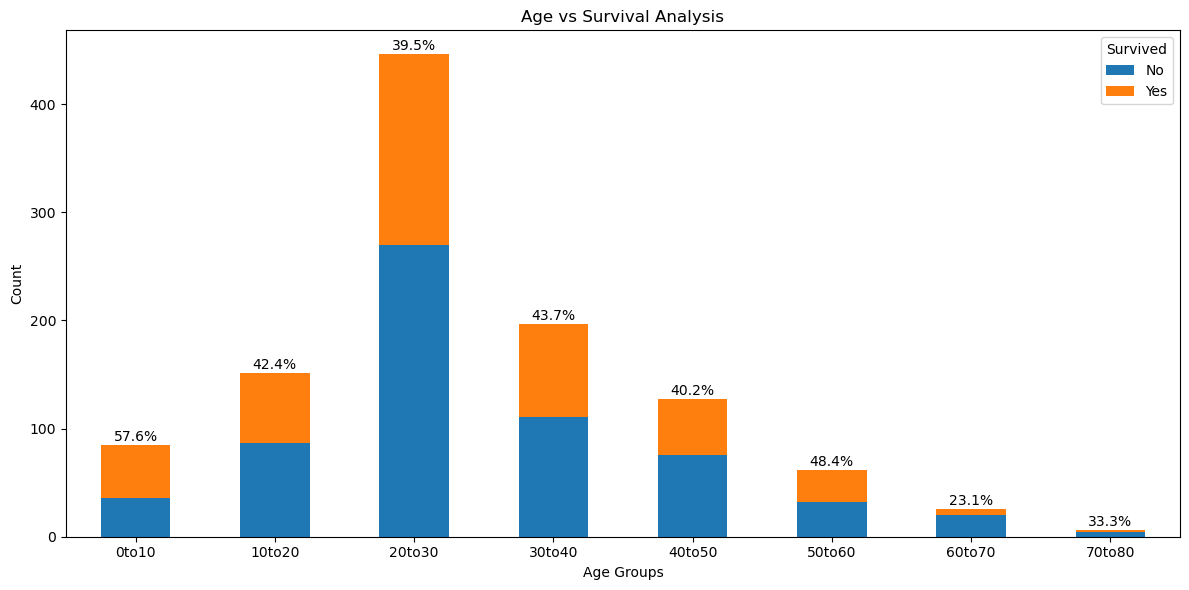

In [67]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ["0to10", "10to20", "20to30", "30to40", "40to50", "50to60", "60to70", "70to80"]

df['age_group'] = pd.cut(df['age'], bins=bins,labels=labels, include_lowest=True)

survival_by_age = pd.crosstab(df['age_group'], df['survived'])

fig, ax = plt.subplots(figsize=(12, 6))
survival_by_age.plot(kind='bar', stacked=True, ax=ax)
plt.title('Age vs Survival Analysis')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['No', 'Yes'])

for i, (age_group, row) in enumerate(survival_by_age.iterrows()):
    total = row.sum()
    if total > 0:
        survival_pct = row[1] / total * 100 
    else:
        survival_pct = 0
    ax.text(i, total + 1, f'{survival_pct:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

##### iv. Correlation Between Survival and Wether the Passenger is Travelling Alone  

<Figure size 1200x600 with 0 Axes>

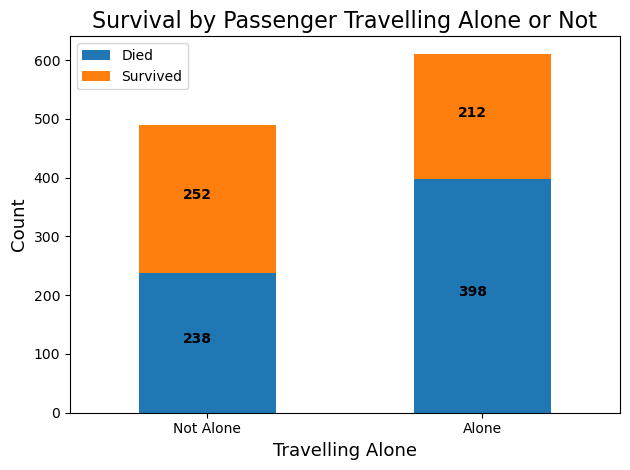

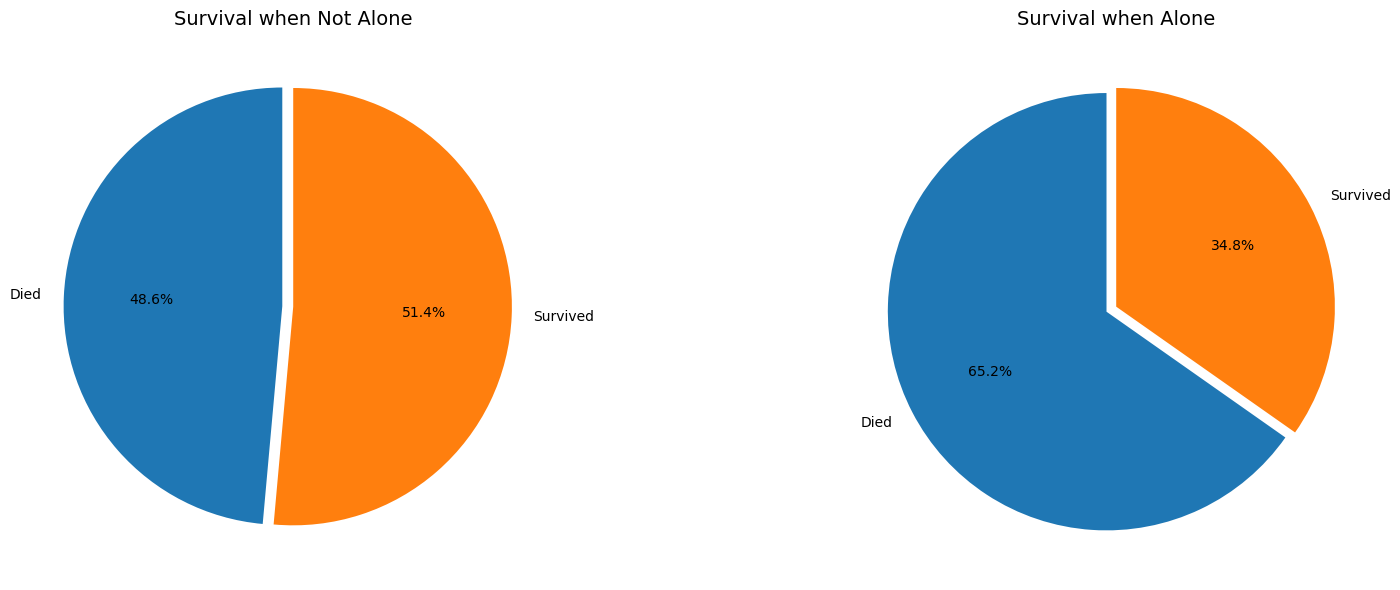

In [68]:
survival_by_is_alone = pd.crosstab(df['is_alone'], df['survived'],
                                   rownames=['Is Alone'],
                                   colnames=['Survived'],)

survival_by_is_alone.columns = ['Died', 'Survived']

survival_percentages = {}
for is_alone in df['is_alone'].unique():
    alone_data = df[df['is_alone'] == is_alone]
    total = len(alone_data)
    survived = alone_data['survived'].sum()
    died = total - survived
    survival_percentages[is_alone] = [died/total*100, survived/total*100]

plt.figure(figsize=(12, 6))
survival_by_is_alone.plot(kind='bar', stacked=True)
plt.title('Survival by Passenger Travelling Alone or Not', fontsize=16)
plt.xlabel('Travelling Alone', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.xticks([0, 1], ['Not Alone', 'Alone'], rotation=0)
plt.legend(['Died', 'Survived'])

for i, (died, survived) in enumerate(zip(survival_by_is_alone['Died'], survival_by_is_alone['Survived'])):
    plt.text(i-0.09, died/2, str(died), fontweight='bold')
    plt.text(i-0.09, died + survived/2, str(survived), fontweight='bold')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
classes = [0, 1]

for i, is_alone in enumerate(classes):
    axes[i].pie(survival_percentages[is_alone], 
                labels=['Died', 'Survived'],
                autopct='%1.1f%%',
                startangle=90,
                explode=(0.05, 0))
    axes[i].set_title(f'Survival when {"Not Alone" if is_alone == 0 else "Alone"}', fontsize=14)

plt.tight_layout()
plt.show()